# LAB - 01 ||  SIS- 420 - REGRESIÓN LINEAL MULTIPLE
---
## Integrantes: 
* Cervantes Torres Atzel Alan - CICO
* Leaños Ortiz Adam Brayan - CICO
* Rodas Palacios Max Jherson - CICO
* Sánchez Lima Diego Franco - CICO
* Vela Gutiérrez Elmer Vela - CICO

In [126]:
#IMPORTAMOS LAS LIBRERIAS NECESARIAS
import pandas as pd
import numpy as np
from matplotlib import pyplot

# CARGANDO LOS DATOS

En esta sección, se carga el conjunto de datos desde un archivo CSV.


In [127]:
data = pd.read_csv('J:/Lab01_SIS_420/Super_Shop/super_shop_dataset.csv')
# print(data.head())
print(data['Profit'])

0       -468.32
1       1118.40
2        394.62
3       2629.80
4      -1584.38
         ...   
4995     125.20
4996   -2362.44
4997    -647.00
4998     970.50
4999    1735.80
Name: Profit, Length: 5000, dtype: float64


# TRANSFORMANDO LOS DATOS 
La función `transformarData` convierte las columnas categóricas en códigos numéricos, lo cual es necesario para que los algoritmos de regresión lineal puedan procesar estos datos. A continuación se muestra la implementación de la función:


In [128]:
def transformarData(data):
    newColum = data.astype("category")
    newColum = newColum.cat.codes
    return newColum

In [129]:
# Y = final price
# X = all columns except final price
data = pd.read_csv('J:/Lab01_SIS_420/Super_Shop/super_shop_dataset.csv')
save_column = [
    'Category', 'Brand', 'Price', 'Discount', 'Sold_Quantity', 
    'Rating', 'Reviews', 'Supplier', 'Purchase_Cost', 'Final_Price'
]

y = data['Profit'].values
data = data.drop(columns=[col for col in data.columns if col not in save_column])


object_data = data.select_dtypes(include=['object'])
number_data = data.select_dtypes(include=['int64', 'float64'])

for i in range(object_data.shape[1]):
    column_name = object_data.columns[i] 
    print(column_name)
    procesado = transformarData(object_data[column_name])
    number_data = pd.concat([number_data, procesado], axis=1)

print(number_data.head())
print(number_data.dtypes)

X = number_data.values
m = y.size
print(m)

Category
Brand
Supplier
   Price  Discount  Final_Price  Sold_Quantity  Rating  Reviews  \
0   2684        23      2066.68             21     1.5      427   
1   2704        15      2298.40             62     2.6      383   
2   3173         6      2982.62             11     3.9       50   
3   4320        26      3196.80              9     4.5      106   
4   2557        34      1687.62             73     2.0       72   

   Purchase_Cost  0  0  0  
0           2535  4  2  2  
1           1180  0  3  1  
2           2588  4  0  0  
3            567  2  4  0  
4           3272  2  3  2  
Price              int64
Discount           int64
Final_Price      float64
Sold_Quantity      int64
Rating           float64
Reviews            int64
Purchase_Cost      int64
0                   int8
0                   int8
0                   int8
dtype: object
5000


# Normalización de caracteristicas

Al visualizar los datos se puede observar que las caracteristicas tienen diferentes magnitudes, por lo cual se debe transformar cada valor en una escala de valores similares, esto con el fin de que el descenso por el gradiente pueda converger mas rapidamente.

La desviación estándar es una forma de medir cuánta variación hay en el rango de valores de una característica en particular (la mayoría de los puntos caeran en un rango de ± 2 en relación a la desviaciones estándar de la media); esta es una alternativa a tomar el rango de valores (max-min). En numpy, se puede usar la función std para calcular la desviacion estandar.

Por ejemplo, la caracteristicaX[:, 0] contiene todos los valores de  x1  (tamaño de las casas) en el conjunto de entrenamiento, entonces np.std(X[:, 0]) calcula la desviacion estandar de los tamaños de las casas. En el momento en que se llama a la función featureNormalize, la columna adicional de unos correspondiente a  x0=1  aún no se ha agregado a  X .

La función `featureNormalize` se utiliza para normalizar las características de un conjunto de datos. Esto implica ajustar los valores de las características para que tengan una media de 0 y una desviación estándar de 1. Este proceso es importante para mejorar el rendimiento de los algoritmos de aprendizaje automático, ya que asegura que todas las características contribuyan de manera equitativa al modelo. La función devuelve los datos normalizados, así como los valores de la media y la desviación estándar utilizados en el proceso de normalización.

In [130]:
def  featureNormalize(X):

    X_norm = X.copy()
    mu = np.zeros(X.shape[1])
    sigma = np.zeros(X.shape[1])
    mu = np.mean(X, axis = 0)
    sigma = np.std(X, axis = 0)
    X_norm = (X - mu) / sigma

    return X_norm, mu, sigma

In [131]:
# llama featureNormalize con los datos cargados
X_norm, mu, sigma = featureNormalize(X)

print(X)
print('Media calculada:', mu)
print('Desviación estandar calculada:', sigma)
print(X_norm)

[[2.68400e+03 2.30000e+01 2.06668e+03 ... 4.00000e+00 2.00000e+00
  2.00000e+00]
 [2.70400e+03 1.50000e+01 2.29840e+03 ... 0.00000e+00 3.00000e+00
  1.00000e+00]
 [3.17300e+03 6.00000e+00 2.98262e+03 ... 4.00000e+00 0.00000e+00
  0.00000e+00]
 ...
 [7.60000e+01 2.50000e+01 5.70000e+01 ... 1.00000e+00 3.00000e+00
  2.00000e+00]
 [2.21000e+03 5.00000e+00 2.09950e+03 ... 1.00000e+00 2.00000e+00
  2.00000e+00]
 [1.96000e+03 2.00000e+00 1.92080e+03 ... 2.00000e+00 4.00000e+00
  0.00000e+00]]
Media calculada: [2.49650220e+03 2.41896000e+01 1.88953383e+03 4.98118000e+01
 3.00966000e+00 2.46230800e+02 2.00957160e+03 1.96880000e+00
 1.99460000e+00 1.01540000e+00]
Desviación estandar calculada: [1.43663193e+03 1.42919436e+01 1.15578986e+03 2.90647343e+01
 1.13983538e+00 1.44413402e+02 1.14658813e+03 1.42078378e+00
 1.41314219e+00 8.25568192e-01]
[[ 0.13051207 -0.0832357   0.15326849 ...  1.42963343  0.00382127
   1.19263316]
 [ 0.14443352 -0.64299162  0.35375476 ... -1.38571401  0.71146415
  -0.

In [132]:
X = np.concatenate([np.ones((m, 1)), X_norm], axis=1)

# DESCENSO POR LA GRADIENTE

En el ejemplo anterior se implemento el descenso por el gradiente para un problema de regresion univariable. La unica diferencia es que ahora existe una caracteristica adicional en la matriz $X$. La función de hipótesis y la regla de actualización del descenso del gradiente por lotes permanecen sin cambios.

La implementacion de las funciones `computeCostMulti` y `gradientDescentMulti` son similares a la funcion de costo y función de descenso por el gradiente de la regresión lineal multiple es similar al de la regresion lineal multivariable. Es importante garantizar que el codigo soporte cualquier numero de caracteristicas y esten bien vectorizadas.

Se puede utilizar `shape`, propiedad de los arrays `numpy`, para identificar cuantas caracteristicas estan consideradas en el dataset.

**Nota de implementación:** En el caso de multivariables, la función de costo puede se escrita considerando la forma vectorizada de la siguiente manera:

$$ J(\theta) = \frac{1}{2m}(X\theta - \vec{y})^T(X\theta - \vec{y}) $$

donde:

$$ X = \begin{pmatrix}
- (x^{(1)})^T - \\
- (x^{(2)})^T - \\
\vdots \\
- (x^{(m)})^T - \\ \\
\end{pmatrix} \qquad \mathbf{y} = \begin{bmatrix} y^{(1)} \\ y^{(2)} \\ \vdots \\ y^{(m)} \\\end{bmatrix}$$

La version vectorizada es eficiente cuando se trabaja con herramientas de calculo numericos computacional como `numpy`.


In [133]:
def computeCostMulti(X, y, theta):
    # Inicializa algunos valores utiles
    m = y.shape[0] # numero de ejemplos de entrenamiento

    J = 0

    # h = np.dot(X, theta)

    J = (1/(2 * m)) * np.sum(np.square(np.dot(X, theta) - y))

    return J

In [134]:
def gradientDescentMulti(X, y, theta, alpha, num_iters):

    # Inicializa algunos valores
    m = y.shape[0] # numero de ejemplos de entrenamiento

    # realiza una copia de theta, el cual será acutalizada por el descenso por el gradiente

    theta = theta.copy()

    J_history = []

    for i in range(num_iters):
        theta = theta - (alpha / m) * (np.dot(X, theta) - y).dot(X)
        J_history.append(computeCostMulti(X, y, theta))

    return theta, J_history

# Seleccionando coheficientes de aprendizaje

theta calculado por el descenso por el gradiente: [-1.19999089e+02  4.83669355e+02 -1.60851509e+02  6.48473983e+02
  5.47858737e-01 -6.76453437e-01  4.79597364e-01 -1.14604363e+03
 -1.85375155e+00 -2.86342994e-01 -1.13248978e+00]


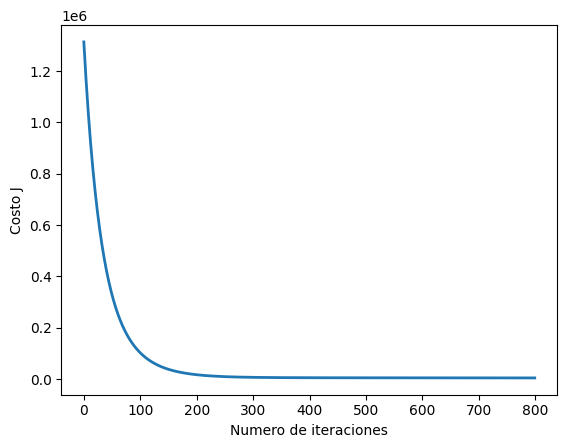

In [135]:
# Elegir algun valor para alpha (probar varias alternativas)
alpha = 0.01 # alpha = 0.003
num_iters = 800

# inicializa theta y ejecuta el descenso por el gradiente
theta = np.zeros(11)
theta, J_history = gradientDescentMulti(X, y, theta, alpha, num_iters)

# Grafica la convergencia del costo
pyplot.plot(np.arange(len(J_history)), J_history, lw=2)
pyplot.xlabel('Numero de iteraciones')
pyplot.ylabel('Costo J')

# Muestra los resultados del descenso por el gradiente
print('theta calculado por el descenso por el gradiente: {:s}'.format(str(theta)))

# Estimar el precio para una casa de 1650 sq-ft, con 3 dormitorios


In [136]:
X_array = [1, 2684, 23, 2066.68, 21, 1.5, 427, 2535,  4,  2,  2]
print('mu', mu)
print('sigma', sigma.size)
X_array[1:11] = (X_array[1:11] - mu) / sigma
price = np.dot(X_array, theta)   # Se debe cambiar esto
print('Ganancia:', price)




mu [2.49650220e+03 2.41896000e+01 1.88953383e+03 4.98118000e+01
 3.00966000e+00 2.46230800e+02 2.00957160e+03 1.96880000e+00
 1.99460000e+00 1.01540000e+00]
sigma 10
Ganancia: -472.3228144792221


# ECUACIÓN DE LA NORMAL

Una manera de calcular rapidamente el modelo de una regresion lineal es:

$$ \theta = \left( X^T X\right)^{-1} X^T\vec{y}$$

Utilizando esta formula no requiere que se escale ninguna caracteristica, y se obtendra una solucion exacta con un solo calculo: no hay “bucles de convergencia” como en el descenso por el gradiente.

Primero se recargan los datos para garantizar que las variables no esten modificadas. Recordar que no es necesario escalar las caracteristicas, se debe agregar la columna de unos a la matriz $X$ para tener el termino de intersección($\theta_0$). Ecuacion de la normal


In [137]:
data = pd.read_csv('J:/Lab01_SIS_420/Super_Shop/super_shop_dataset.csv')
save_column = [
    'Category', 'Brand', 'Price', 'Discount', 'Sold_Quantity', 
    'Rating', 'Reviews', 'Supplier', 'Purchase_Cost', 'Final_Price'
]

y = data['Profit'].values
data = data.drop(columns=[col for col in data.columns if col not in save_column])


object_data = data.select_dtypes(include=['object'])
number_data = data.select_dtypes(include=['int64', 'float64'])

for i in range(object_data.shape[1]):
    column_name = object_data.columns[i] 
    print(column_name)
    procesado = transformarData(object_data[column_name])
    number_data = pd.concat([number_data, procesado], axis=1)

print(number_data.head())
print(number_data.dtypes)

X = number_data.values
m = y.size
print(m)
# [3000, 20, 2000, 20, 1.5, 400, 2000, 2, 2, 2 ]
# Datos Conocidos
# [2684, 23, 2066.68, 21, 1.5, 427, 2535,  4,  2,  2]

Category
Brand
Supplier
   Price  Discount  Final_Price  Sold_Quantity  Rating  Reviews  \
0   2684        23      2066.68             21     1.5      427   
1   2704        15      2298.40             62     2.6      383   
2   3173         6      2982.62             11     3.9       50   
3   4320        26      3196.80              9     4.5      106   
4   2557        34      1687.62             73     2.0       72   

   Purchase_Cost  0  0  0  
0           2535  4  2  2  
1           1180  0  3  1  
2           2588  4  0  0  
3            567  2  4  0  
4           3272  2  3  2  
Price              int64
Discount           int64
Final_Price      float64
Sold_Quantity      int64
Rating           float64
Reviews            int64
Purchase_Cost      int64
0                   int8
0                   int8
0                   int8
dtype: object
5000


In [138]:
def normalEqn(X, y):

    theta = np.zeros(X.shape[1])

    theta = np.dot(np.dot(np.linalg.inv(np.dot(X.T,X)),X.T),y)

    return theta

In [139]:
#Calcula los parametros con la ecuación de la normal
theta = normalEqn(X, y);


# Muestra los resultados optenidos a partir de la aplicación de la ecuación de la normal
print('Theta calculado a partir de la ecuación de la normal: {:s}'.format(str(theta)));

# Estimar el precio para una casa de superficie de 1650 sq-ft y tres dormitorios

# X_array = [3000, 20, 2000, 20, 1.5, 400, 2000, 2, 2, 2 ]
X_array = [2684, 23, 2066.68, 21, 1.5, 427, 2535,  4,  2,  2]
price = np.dot(X_array, theta)

print('La ganancia neta es de: ${:.0f}'.format(price))
print('Ganaste: ', price)

Theta calculado a partir de la ecuación de la normal: [ 1.74027459e-14 -5.42232925e-13  1.00000000e+00  2.97539771e-14
 -9.14823772e-14  3.21964677e-15 -1.00000000e+00  6.43041176e-13
  1.24344979e-14  1.08002496e-12]
La ganancia neta es de: $-468
Ganaste:  -468.31999999999863
